In [4]:
import sys

sys.path.append("..")

import os

project_root = os.path.dirname(os.path.dirname(os.path.abspath("__file__")))

import pandas as pd
from training import TrainingManager, TrainingConfig
from envs.trading_env import MyTradingEnv

N_EPISODES=1_000

MAX_STEPS=1_000
LEARNING_RATE=0.1
DISCOUNT_FACTOR=0.99
EPSILON_START=1.0
EPSILON_END=0.01
EPSILON_DECAY=0.995
EVAL_FREQUANCY=500
SAVE_FREQUANCY=1_000

TRAIN_VERSION="v3"

data_path = "../data/data_1h_2023.csv"
df = pd.read_csv(data_path, index_col=0, parse_dates=True, date_format="iso8601")


INITIAL_BALANCE = 1000.0
WINDOW_SIZE = 10
COMMISSION = 0.0001
SLIPPAGE = 0.0005
MAX_HOLDING_TIME = 60 * 24
HOLDING_THRESHOLD = 24
MAX_DRAWDOWN_THRESHOLD = 0.05
LAMBDA_DRAWDOWN = 0.1 # напрада в процентах
LAMBDA_HOLD = 0.02 # напрада в процентах
REWARD_SCALING=100.0 # напрада в процентах

### Обучение QLearningAgent

In [5]:

from agents.classical.qlearning_agent import QLearningAgent

agent = QLearningAgent()
env = MyTradingEnv(
    df=df,
    initial_balance=INITIAL_BALANCE,
    window_size=WINDOW_SIZE,
    commission=COMMISSION,
    slippage=SLIPPAGE,
    max_holding_time=MAX_HOLDING_TIME,
    lambda_drawdown=LAMBDA_DRAWDOWN,
    lambda_hold=LAMBDA_HOLD,
    reward_scaling=REWARD_SCALING,
)

config = TrainingConfig(
    agent_name=f"QLearning_{TRAIN_VERSION}",
        agent_type="QLearning",
        n_episodes=N_EPISODES,
        max_steps=MAX_STEPS,
        learning_rate=LEARNING_RATE,
        discount_factor=DISCOUNT_FACTOR,
        epsilon_start=EPSILON_START,
        epsilon_end=EPSILON_END,
        epsilon_decay=EPSILON_DECAY,
        eval_frequency=EVAL_FREQUANCY,
        save_frequency=SAVE_FREQUANCY
)

manager = TrainingManager(
    base_log_dir=os.path.join(project_root, "training_data/logs"),
    base_checkpoint_dir=os.path.join(project_root, "training_data/checkpoints")
)
results = manager.train_agent(agent, env, config, experiment_name=f"exp_qlearn_{TRAIN_VERSION}")


Начало обучения: QLearning_v3
Эксперимент: exp_qlearn_v3
Эпизодов: 1000
Learning rate: 0.1
Discount factor: 0.99

Эпизод 500/1000
  Награда: 127.47 | Средняя (100): 278.31
  Оценка: 955.93 ± 0.00
  Epsilon: 0.0816 | Состояний: 72
  Сделок: 45 | Win Rate: 31.1%
  Портфель: $1132.95

Эпизод 1000/1000
  Награда: 1067.24 | Средняя (100): 1307.50
  Оценка: 1093.63 ± 0.00
  Epsilon: 0.0100 | Состояний: 72
  Сделок: 26 | Win Rate: 30.8%
  Портфель: $1116.78

Агент сохранён: /mnt/d/Study/Code/ml/TradingAgentClassicRL/training_data/checkpoints/exp_qlearn_v3/checkpoint_ep1000.pkl
Агент сохранён: /mnt/d/Study/Code/ml/TradingAgentClassicRL/training_data/checkpoints/exp_qlearn_v3/final_agent.pkl

✓ Логи сохранены в: /mnt/d/Study/Code/ml/TradingAgentClassicRL/training_data/logs/exp_qlearn_v3

Обучение завершено!
Время обучения: 2.90 минут
Финальная награда: 1067.24
Размер Q-таблицы: 72 состояний



### Обучение MonteCarloAgent

In [7]:
from agents.classical.monte_carlo_agent import MonteCarloAgent

agent = MonteCarloAgent()
env = MyTradingEnv(df=df)

config = TrainingConfig(
    agent_name=f"MonteCarlo_{TRAIN_VERSION}",
        agent_type="MonteCarlo",
        n_episodes=N_EPISODES,
        max_steps=MAX_STEPS,
        learning_rate=LEARNING_RATE,
        discount_factor=DISCOUNT_FACTOR,
        epsilon_start=EPSILON_START,
        epsilon_end=EPSILON_END,
        epsilon_decay=EPSILON_DECAY,
        eval_frequency=EVAL_FREQUANCY,
        save_frequency=SAVE_FREQUANCY
)

manager = TrainingManager(
    base_log_dir=os.path.join(project_root, "training_data/logs"),
    base_checkpoint_dir=os.path.join(project_root, "training_data/checkpoints")
)
results = manager.train_agent(agent, env, config, experiment_name=f"exp_monte_carlo_{TRAIN_VERSION}")


Начало обучения: MonteCarlo_v2
Эксперимент: exp_monte_carlo_v2
Эпизодов: 10000
Learning rate: 0.1
Discount factor: 0.99

Эпизод 500/10000
  Награда: 62.29 | Средняя (100): 49.93
  Оценка: 111.19 ± 0.00
  Epsilon: 0.0816 | Состояний: 72
  Сделок: 43 | Win Rate: 39.5%
  Портфель: $1111.22

Эпизод 1000/10000
  Награда: 299.93 | Средняя (100): 207.28
  Оценка: 290.06 ± 0.00
  Epsilon: 0.0100 | Состояний: 72
  Сделок: 87 | Win Rate: 50.6%
  Портфель: $1293.63

SARSA(λ) агент сохранён: /mnt/d/Study/Code/ml/TradingAgentClassicRL/training_data/checkpoints/exp_monte_carlo_v2/checkpoint_ep1000.pkl
Эпизод 1500/10000
  Награда: 155.89 | Средняя (100): 300.87
  Оценка: 93.28 ± 0.00
  Epsilon: 0.0100 | Состояний: 72
  Сделок: 121 | Win Rate: 55.4%
  Портфель: $1093.38

Эпизод 2000/10000
  Награда: 135.30 | Средняя (100): 237.21
  Оценка: -19.45 ± 0.00
  Epsilon: 0.0100 | Состояний: 72
  Сделок: 99 | Win Rate: 47.5%
  Портфель: $980.78

SARSA(λ) агент сохранён: /mnt/d/Study/Code/ml/TradingAgentClass

### Обучение SarsaAgent

In [8]:
from agents.classical.sarsa_agent import SarsaAgent

agent = SarsaAgent()
env = MyTradingEnv(df=df)

config = TrainingConfig(
    agent_name=f"SARSA_{TRAIN_VERSION}",
        agent_type="SARSA",
        n_episodes=N_EPISODES,
        max_steps=MAX_STEPS,
        learning_rate=LEARNING_RATE,
        discount_factor=DISCOUNT_FACTOR,
        epsilon_start=EPSILON_START,
        epsilon_end=EPSILON_END,
        epsilon_decay=EPSILON_DECAY,
        eval_frequency=EVAL_FREQUANCY,
        save_frequency=SAVE_FREQUANCY
)

manager = TrainingManager(
    base_log_dir=os.path.join(project_root, "training_data/logs"),
    base_checkpoint_dir=os.path.join(project_root, "training_data/checkpoints")
)
results = manager.train_agent(agent, env, config, experiment_name=f"exp_sarsa_{TRAIN_VERSION}")


Начало обучения: SARSA_v2
Эксперимент: exp_sarsa_v2
Эпизодов: 10000
Learning rate: 0.1
Discount factor: 0.99

Эпизод 500/10000
  Награда: 69.95 | Средняя (100): 74.25
  Оценка: 141.18 ± 0.00
  Epsilon: 0.0816 | Состояний: 72
  Сделок: 47 | Win Rate: 31.9%
  Портфель: $1141.25

Эпизод 1000/10000
  Награда: 157.30 | Средняя (100): 167.56
  Оценка: 174.27 ± 0.00
  Epsilon: 0.0100 | Состояний: 72
  Сделок: 24 | Win Rate: 37.5%
  Портфель: $1174.92

SARSA(λ) агент сохранён: /mnt/d/Study/Code/ml/TradingAgentClassicRL/training_data/checkpoints/exp_sarsa_v2/checkpoint_ep1000.pkl
Эпизод 1500/10000
  Награда: 173.03 | Средняя (100): 159.06
  Оценка: 172.32 ± 0.00
  Epsilon: 0.0100 | Состояний: 72
  Сделок: 22 | Win Rate: 40.9%
  Портфель: $1173.01

Эпизод 2000/10000
  Награда: 170.20 | Средняя (100): 161.94
  Оценка: 172.32 ± 0.00
  Epsilon: 0.0100 | Состояний: 72
  Сделок: 22 | Win Rate: 50.0%
  Портфель: $1173.01

SARSA(λ) агент сохранён: /mnt/d/Study/Code/ml/TradingAgentClassicRL/training_da

### Обучение SarsaLambdaAgent

In [9]:
from agents.classical.sarsa_lambda_agent import SarsaLambdaAgent

agent = SarsaLambdaAgent()
env = MyTradingEnv(df=df)

config = TrainingConfig(
    agent_name=f"SARSALambda_{TRAIN_VERSION}",
        agent_type="SARSALambda",
        n_episodes=N_EPISODES,
        max_steps=MAX_STEPS,
        learning_rate=LEARNING_RATE,
        discount_factor=DISCOUNT_FACTOR,
        epsilon_start=EPSILON_START,
        epsilon_end=EPSILON_END,
        epsilon_decay=EPSILON_DECAY,
        eval_frequency=EVAL_FREQUANCY,
        save_frequency=SAVE_FREQUANCY
)

manager = TrainingManager(
    base_log_dir=os.path.join(project_root, "training_data/logs"),
    base_checkpoint_dir=os.path.join(project_root, "training_data/checkpoints")
)
results = manager.train_agent(agent, env, config, experiment_name=f"exp_sarsa_lambda_{TRAIN_VERSION}")


Начало обучения: SARSALambda_v2
Эксперимент: exp_sarsa_lambda_v2
Эпизодов: 10000
Learning rate: 0.1
Discount factor: 0.99

Эпизод 500/10000
  Награда: -81.88 | Средняя (100): 117.31
  Оценка: 33.63 ± 0.00
  Epsilon: 0.0816 | Состояний: 72
  Сделок: 64 | Win Rate: 32.8%
  Портфель: $1038.15

Эпизод 1000/10000
  Награда: 250.32 | Средняя (100): 244.19
  Оценка: 244.44 ± 0.00
  Epsilon: 0.0100 | Состояний: 72
  Сделок: 95 | Win Rate: 46.3%
  Портфель: $1257.47

SARSA(λ) агент сохранён: /mnt/d/Study/Code/ml/TradingAgentClassicRL/training_data/checkpoints/exp_sarsa_lambda_v2/checkpoint_ep1000.pkl
Эпизод 1500/10000
  Награда: 210.56 | Средняя (100): 179.50
  Оценка: 214.34 ± 0.00
  Epsilon: 0.0100 | Состояний: 72
  Сделок: 26 | Win Rate: 46.2%
  Портфель: $1217.15

Эпизод 2000/10000
  Награда: 267.01 | Средняя (100): 249.56
  Оценка: 282.49 ± 0.00
  Epsilon: 0.0100 | Состояний: 72
  Сделок: 55 | Win Rate: 41.8%
  Портфель: $1287.18

SARSA(λ) агент сохранён: /mnt/d/Study/Code/ml/TradingAgent

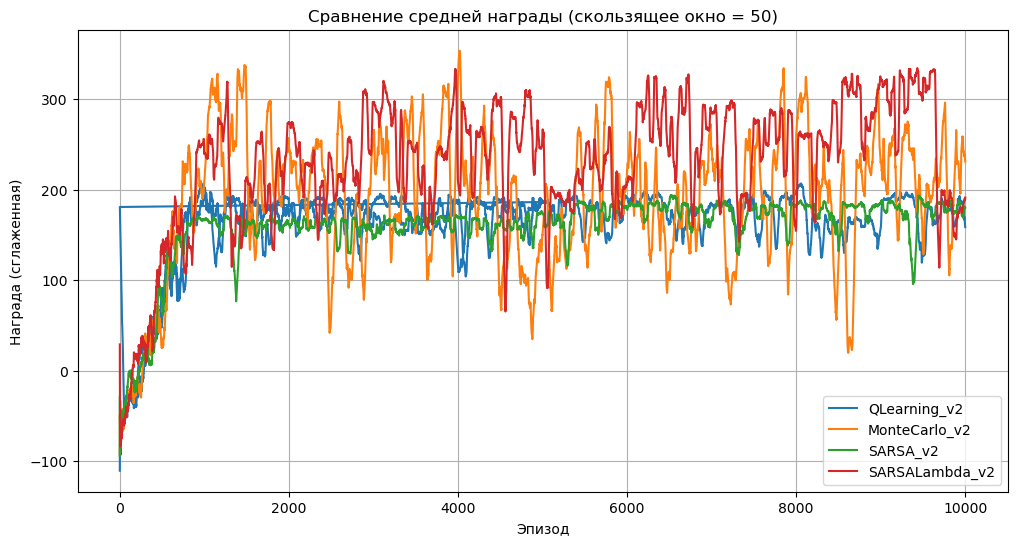

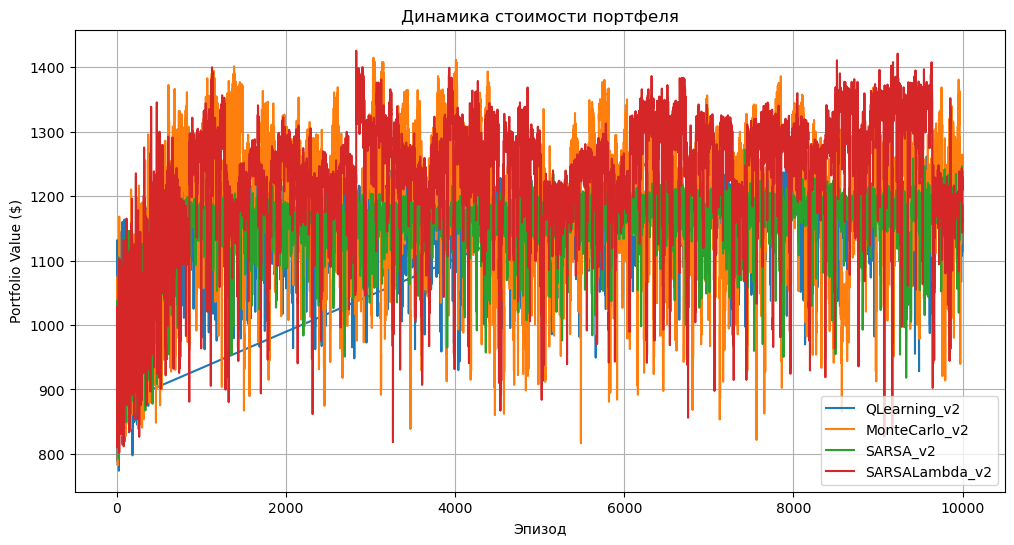

,agent,reward,portfolio_value,win_rate,n_trades,max_drawdown
14999,QLearning_v2,155.87,1161.02,37.50,24,0.02
25043,MonteCarlo_v2,259.74,1260.44,52.17,69,0.02
35043,SARSA_v2,182.55,1184.81,44.00,25,0.02
45043,SARSALambda_v2,233.56,1238.04,54.76,42,0.02


In [10]:

import pandas as pd
import matplotlib.pyplot as plt
import json
from pathlib import Path

experiment_dirs = [
    f"../training_data/logs/exp_qlearn_{TRAIN_VERSION}",
    f"../training_data/logs/exp_monte_carlo_{TRAIN_VERSION}",
    f"../training_data/logs/exp_sarsa_{TRAIN_VERSION}",
    f"../training_data/logs/exp_sarsa_lambda_{TRAIN_VERSION}",
]

all_data = []
for exp_dir in experiment_dirs:
    exp_dir = Path(exp_dir)
    episodes_df = pd.read_csv(exp_dir / "episodes.csv")
    with open(exp_dir / "training_summary.json") as f:
        summary = json.load(f)
    agent_name = summary["config"]["agent_name"]
    episodes_df["agent"] = agent_name
    all_data.append(episodes_df)


df = pd.concat(all_data, ignore_index=True)

plt.figure(figsize=(12, 6))
for agent in df["agent"].unique():
    agent_data = df[df["agent"] == agent]
    smoothed = agent_data["reward"].rolling(window=50, min_periods=1).mean()
    plt.plot(agent_data["episode"], smoothed, label=agent)

plt.title("Сравнение средней награды (скользящее окно = 50)")
plt.xlabel("Эпизод")
plt.ylabel("Награда (сглаженная)")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))
for agent in df["agent"].unique():
    agent_data = df[df["agent"] == agent]
    plt.plot(agent_data["episode"], agent_data["portfolio_value"], label=agent)

plt.title("Динамика стоимости портфеля")
plt.xlabel("Эпизод")
plt.ylabel("Portfolio Value ($)")
plt.legend()
plt.grid(True)
plt.show()


final_metrics = df.groupby("agent").tail(1)[
    ["agent", "reward", "portfolio_value", "win_rate", "n_trades", "max_drawdown"]
]
display(final_metrics.round(2))